In [1]:
from pandas import Series, concat

from project.model import get_inputs
from project.utils import make_plot
from project.input.resources import resources_data

In [2]:
output = get_inputs(variables=['buildings', 'energy_prices'], building_stock='project/input/stock/buildingstock_sdes2018_medium_3.csv')

2023-01-09 17:04:59,090 - 66427 - log_ - INFO - Creating AgentBuildings object


In [3]:
buildings, prices = output['buildings'], output['energy_prices']
price = prices.loc[2018, :]

In [4]:
# calibration
buildings.calculate_consumption(price)
buildings.coefficient_consumption

Heating energy
Electricity    0.683265
Natural gas    1.053988
Oil fuel       0.804870
Wood fuel      3.558438
dtype: float64

## Outdoor temperature

In [5]:
result = {}
for year in range(2010, 2020):
    buildings.calculate_consumption(price, climate=year)
    result.update({year: buildings.heat_consumption_calib.sum() / 10**9})

result = Series(result).rename('Calculated')

In [6]:
result = concat((result, resources_data['consumption_total_hist_climate']), axis=1)

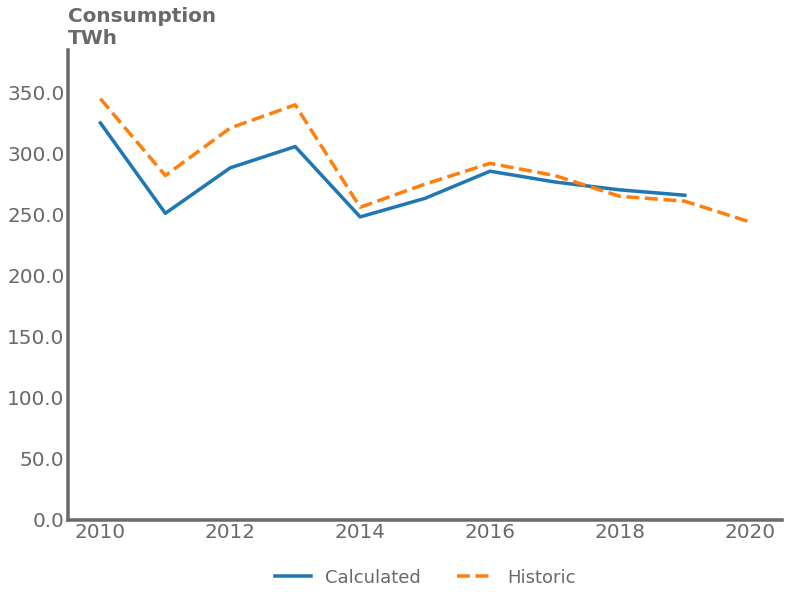

In [7]:
make_plot(result, 'Consumption (TWh)')

Conclusion: the energy model reproduces well the impact of climate on aggregated energy consumption.
As the energy performance of the building stock is fixed in these calculation, it is normal to underestimate the consumption in the past.

## Indoor temperature

In [11]:
result = {}
for temp_indoor in range(17, 25):
    buildings.calculate_consumption(price, temp_indoor=temp_indoor)
    result.update({temp_indoor: buildings.heat_consumption_calib.sum() / 10**9})

result = Series(result).rename('Calculated')
result

17    241.591898
18    263.165561
19    284.000000
20    304.145075
21    323.646034
22    342.543709
23    360.874885
24    378.672710
Name: Calculated, dtype: float64

In [14]:
result.diff() / result

17         NaN
18    0.081978
19    0.073361
20    0.066235
21    0.060254
22    0.055169
23    0.050796
24    0.047001
Name: Calculated, dtype: float64